In [1]:
import sys, imp, os
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
import nasdaqdatalink as ndl
import yaml
from tools.instruments import instruments, Quotes
from tools.constants import SRF_CONTINUOUS_BO_DB_PATH
from tools.display import ohlc_chart, view
import backtesting as bt
import re

In [2]:
with open('backtesting/system1.yaml', encoding='utf-8') as f:
    system1 = yaml.load(f, Loader=yaml.FullLoader)
    print(system1)

{'name': 'tf05', 'description': '시스템 설명', 'quotes_style': 'bo', 'sectors': 'default', 'instruments': ['AD', 'CL', 'C', 'LC'], 'from_date': '2002-01-01', 'to_date': '2004-01-01', 'principal': 100000, 'heat_system': 'DefaultHeat', 'max_system_heat': 0.4, 'max_sector_heat': 0.4, 'max_trade_heat': 0.1, 'max_lots': 2, 'commission': 2.99, 'skid': 0.25, 'metrics': [['ema200', 'EMA', 'window=200'], ['ma20', 'MA', 'window=20'], ['ma200', 'MA', 'window=200'], ['volatility', 'ATR', 'window=30'], ['min20', 'MIN', 'window=20'], ['max20', 'MAX', 'window=20']], 'entry_rule': {'long': 'ma200>ma20', 'short': None}, 'exit_rule': {'long': 'ema200<ma20', 'short': None}, 'stop_rule': {'long': 'min20', 'short': None}}


In [3]:
trader = bt.Trader(quotes_style='bo', systems=[system1])
#trader.run()

In [4]:
system = trader.systems[0]

In [5]:
%%time
trader.run()

매매시작
거래일: 2002-01-02 00:00:00, 시스템: tf05
거래일: 2002-01-03 00:00:00, 시스템: tf05
거래일: 2002-01-04 00:00:00, 시스템: tf05
거래일: 2002-01-07 00:00:00, 시스템: tf05
거래일: 2002-01-08 00:00:00, 시스템: tf05
거래일: 2002-01-09 00:00:00, 시스템: tf05
거래일: 2002-01-10 00:00:00, 시스템: tf05
거래일: 2002-01-11 00:00:00, 시스템: tf05
거래일: 2002-01-14 00:00:00, 시스템: tf05
거래일: 2002-01-15 00:00:00, 시스템: tf05
거래일: 2002-01-16 00:00:00, 시스템: tf05
거래일: 2002-01-17 00:00:00, 시스템: tf05
거래일: 2002-01-18 00:00:00, 시스템: tf05
거래일: 2002-01-21 00:00:00, 시스템: tf05
거래일: 2002-01-22 00:00:00, 시스템: tf05
거래일: 2002-01-23 00:00:00, 시스템: tf05
거래일: 2002-01-24 00:00:00, 시스템: tf05
거래일: 2002-01-25 00:00:00, 시스템: tf05
거래일: 2002-01-28 00:00:00, 시스템: tf05
거래일: 2002-01-29 00:00:00, 시스템: tf05
거래일: 2002-01-30 00:00:00, 시스템: tf05
거래일: 2002-01-31 00:00:00, 시스템: tf05
거래일: 2002-02-01 00:00:00, 시스템: tf05
거래일: 2002-02-04 00:00:00, 시스템: tf05
거래일: 2002-02-05 00:00:00, 시스템: tf05
거래일: 2002-02-06 00:00:00, 시스템: tf05
거래일: 2002-02-07 00:00:00, 시스템: tf05
거래일: 2002-02-08 00:00:0

거래일: 2002-11-28 00:00:00, 시스템: tf05
거래일: 2002-11-29 00:00:00, 시스템: tf05
거래일: 2002-12-02 00:00:00, 시스템: tf05
거래일: 2002-12-03 00:00:00, 시스템: tf05
거래일: 2002-12-04 00:00:00, 시스템: tf05
거래일: 2002-12-05 00:00:00, 시스템: tf05
거래일: 2002-12-06 00:00:00, 시스템: tf05
거래일: 2002-12-09 00:00:00, 시스템: tf05
거래일: 2002-12-10 00:00:00, 시스템: tf05
거래일: 2002-12-11 00:00:00, 시스템: tf05
거래일: 2002-12-12 00:00:00, 시스템: tf05
거래일: 2002-12-13 00:00:00, 시스템: tf05
거래일: 2002-12-16 00:00:00, 시스템: tf05
거래일: 2002-12-17 00:00:00, 시스템: tf05
거래일: 2002-12-18 00:00:00, 시스템: tf05
거래일: 2002-12-19 00:00:00, 시스템: tf05
거래일: 2002-12-20 00:00:00, 시스템: tf05
거래일: 2002-12-23 00:00:00, 시스템: tf05
거래일: 2002-12-24 00:00:00, 시스템: tf05
거래일: 2002-12-26 00:00:00, 시스템: tf05
거래일: 2002-12-27 00:00:00, 시스템: tf05
거래일: 2002-12-30 00:00:00, 시스템: tf05
거래일: 2002-12-31 00:00:00, 시스템: tf05
거래일: 2003-01-02 00:00:00, 시스템: tf05
거래일: 2003-01-03 00:00:00, 시스템: tf05
거래일: 2003-01-06 00:00:00, 시스템: tf05
거래일: 2003-01-07 00:00:00, 시스템: tf05
거래일: 2003-01-08 00:00:00, 시스

거래일: 2003-11-25 00:00:00, 시스템: tf05
거래일: 2003-11-26 00:00:00, 시스템: tf05
거래일: 2003-11-27 00:00:00, 시스템: tf05
거래일: 2003-11-28 00:00:00, 시스템: tf05
거래일: 2003-12-01 00:00:00, 시스템: tf05
거래일: 2003-12-02 00:00:00, 시스템: tf05
거래일: 2003-12-03 00:00:00, 시스템: tf05
거래일: 2003-12-04 00:00:00, 시스템: tf05
거래일: 2003-12-05 00:00:00, 시스템: tf05
거래일: 2003-12-08 00:00:00, 시스템: tf05
거래일: 2003-12-09 00:00:00, 시스템: tf05
거래일: 2003-12-10 00:00:00, 시스템: tf05
거래일: 2003-12-11 00:00:00, 시스템: tf05
거래일: 2003-12-12 00:00:00, 시스템: tf05
거래일: 2003-12-15 00:00:00, 시스템: tf05
거래일: 2003-12-16 00:00:00, 시스템: tf05
거래일: 2003-12-17 00:00:00, 시스템: tf05
거래일: 2003-12-18 00:00:00, 시스템: tf05
거래일: 2003-12-19 00:00:00, 시스템: tf05
거래일: 2003-12-22 00:00:00, 시스템: tf05
거래일: 2003-12-23 00:00:00, 시스템: tf05
거래일: 2003-12-24 00:00:00, 시스템: tf05
거래일: 2003-12-26 00:00:00, 시스템: tf05
거래일: 2003-12-29 00:00:00, 시스템: tf05
거래일: 2003-12-30 00:00:00, 시스템: tf05
거래일: 2003-12-31 00:00:00, 시스템: tf05
CPU times: total: 9.69 s
Wall time: 9.6 s


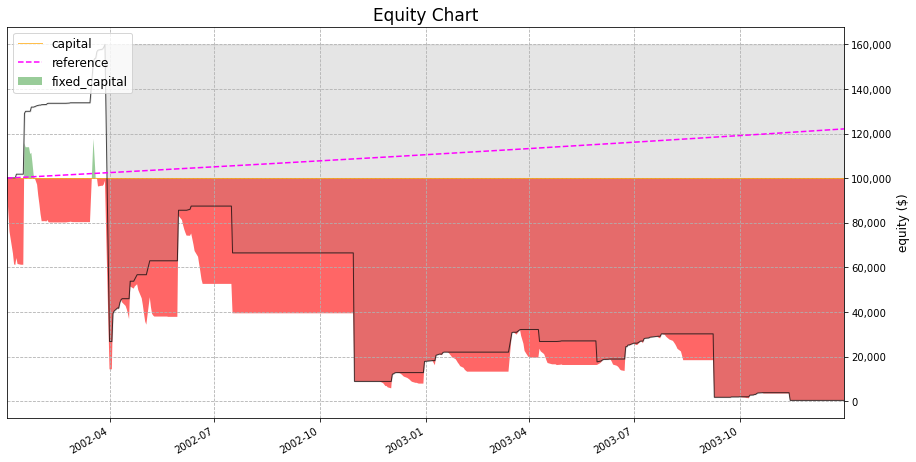

,투자금,최종자산,총손익,Bliss,CAGR,MDD,손익비,승률,위험대비손익,평균손익,평균수익,평균손실,보유기간
Result,"100,000",364,-99.6%,-0.009,-94.0%,99.8%,-0.61,74.1%,-18.6%,-331,712,"-3,314",24 일


In [6]:
system.summary(level=0)

In [10]:
system.summary(level=2)

,총손익,평균손익,표준편차,위험대비손익,승률,보유기간,매매회수
구분,,,,,,,
CBOT Corn,-7356.000000,-34.54,816.60,4.16%,79.34%,14.431925,213
CME Live Cattle,12750.000000,190.30,2491.27,5.13%,70.15%,50.746269,67
NYMEX WTI Crude Oil,-105030.000000,-5001.43,7882.96,-324.67%,33.33%,35.285714,21


In [13]:
quotes = trader.quotes['C'].loc[system.from_date:system.to_date]
tradelog = system.trades.log(symbol='C')

In [12]:
quotes

field,open,high,low,close,volume,oi
date,,,,,,
2002-01-02,486.25,488.00,485.50,486.25,35759.0,252511.0
2002-01-03,486.50,488.50,485.75,488.25,30105.0,253544.0
2002-01-04,488.25,489.00,487.25,488.25,30412.0,255715.0
2002-01-07,488.75,490.75,488.50,489.25,35615.0,256661.0
2002-01-08,489.00,489.75,488.25,489.25,25387.0,255082.0
...,...,...,...,...,...,...
2003-12-24,463.00,472.50,463.00,469.75,97419.0,282994.0
2003-12-26,468.00,474.50,466.75,473.75,62585.0,277086.0
2003-12-29,475.00,478.00,473.50,476.75,39987.0,268782.0


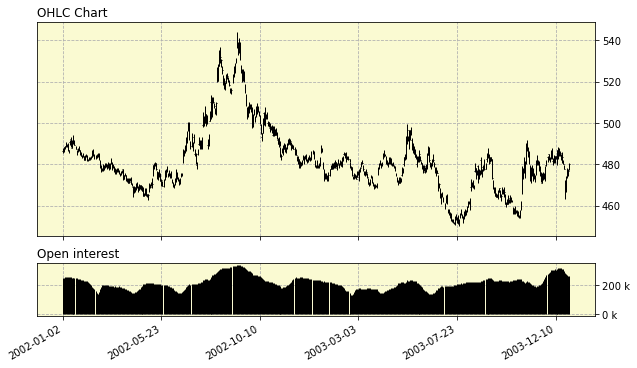

In [16]:
view(quotes)

In [21]:
quotes = trader.loc[start:end].dropna()
        tradelog = self.tradelog[self.tradelog.symbol == symbol]
        #tradelog = tradelog[tradelog.symbol == symbol]
        
        
        if start and end:
            trade = tradelog[ (start <= tradelog.entrydate) & (tradelog.exitdate <= end)]
        else:
            trade = tradelog
        
        cumprofit = trade.profit.cumsum()
        num_trades = len(trade)
        
        fig, (ax) = plt.subplots(2,1, figsize=(15,10),
                                gridspec_kw = {'height_ratios':[3,1]})
        
        #price chart
        ax[0] = ohlc_chart(ax[0], feed, linewidth=0.8)
        for idx, row in trade.iterrows():
            y=feed.loc[row['entrydate']:row['exitdate']]
            colors=['red','red'] if row['position']=='Long' else ['blue','blue']
            ax[0] = ohlc_chart(ax[0], y, colors=colors)
        ax[0].plot(feed[['top','bottom']].shift(1), color='green', linewidth=0.8)
        #tick profit chart
        ax[1].bar(np.arange(1,num_trades+1), np.where(trade.position=='Long', trade.tick, 0), 0.3, color='red', alpha=0.6 )
        ax[1].bar(np.arange(1,num_trades+1), np.where(trade.position=='Short', trade.tick, 0), 0.3, color='blue', alpha=0.6 )
           
        #labels
        name = self.pinfo[symbol]['name']
        ax[0].set_title(name, fontsize=20)
        ax[0].set_ylabel('Price', fontsize=15)
        ax[1].set_ylabel('Profit (tick)', fontsize=15)
       
        #styles
        ax[1].axhline(y=0, linewidth=1, color='darkgrey')
        ax[1].yaxis.tick_right()
        ax[1].set_facecolor('lightgoldenrodyellow')
        ax[1].set_xticks(range(1,num_trades+1))
        ax[1].grid(linestyle='--')

'NYMEX WTI Crude Oil'

In [24]:
table['duration'].mean()

35.285714285714285

In [25]:
df.columns

Index(['id', 'entrydate', 'name', 'symbol', 'sector', 'position', 'entryprice',
       'entrylots', 'entryrisk', 'entryrisk_ticks', 'exits', 'currentprice',
       'stopprice', 'risk', 'risk_ticks', 'lots', 'flame', 'profit',
       'duration', 'exittype', 'result', 'on_fire'],
      dtype='object')

In [6]:
df=pd.DataFrame(system.equity.log())

In [7]:
df2 = df.set_index('date')

In [8]:
df2

,id,principal,capital,security,cash,fixed_capital,profit,risk,system_heat,sector_heat,sector_risk,max_capital,dd,mdd,cagr,commission
date,,,,,,,,,,,,,,,,
2002-01-02,1,100000,100000.0,20900.0,79100.0,95860.0,0.0,4140.0,0.041400,{'petroleum': 0.0414},{'petroleum': 4140.0},100000.0,0.000000,0.000000,0.000000,5.98
2002-01-02,2,100000,100000.0,26730.0,73270.0,95740.0,0.0,4260.0,0.042600,"{'petroleum': 0.0414, 'grain': 0.0012}","{'petroleum': 4140.0, 'grain': 120.0}",100000.0,0.000000,0.000000,0.000000,11.96
2002-01-02,3,100000,100000.0,29810.0,70190.0,93120.0,0.0,6880.0,0.068800,"{'petroleum': 0.0414, 'grain': 0.0012, 'meat':...","{'petroleum': 4140.0, 'grain': 120.0, 'meat': ...",100000.0,0.000000,0.000000,0.000000,17.94
2002-01-02,4,100000,100120.0,23980.0,76140.0,93360.0,120.0,6760.0,0.067519,"{'petroleum': 0.041350379544546546, 'meat': 0....","{'petroleum': 4140.0, 'meat': 2620.0}",100120.0,0.000000,0.000000,0.549198,17.94
2002-01-03,5,100000,100120.0,44880.0,55240.0,88040.0,120.0,12080.0,0.120655,"{'petroleum': 0.09448661606072713, 'meat': 0.0...","{'petroleum': 9460.0, 'meat': 2620.0}",100120.0,0.000000,0.000000,0.244668,23.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003-12-24,1255,100000,364.0,0.0,364.0,364.0,-99636.0,0.0,0.000000,{},{},159978.0,99.772469,99.772469,-0.941516,1710.28
2003-12-26,1256,100000,364.0,0.0,364.0,364.0,-99636.0,0.0,0.000000,{},{},159978.0,99.772469,99.772469,-0.941055,1710.28
2003-12-29,1257,100000,364.0,0.0,364.0,364.0,-99636.0,0.0,0.000000,{},{},159978.0,99.772469,99.772469,-0.940363,1710.28


In [7]:
system

<<시스템: tf05>>

In [12]:
p = system.principal

In [10]:
x = equitylog.index.values
capital = equitylog.capital.values
fixed_capital = equitylog.fixed_capital.values
principal = (capital - equitylog.profit).values
max_capital = equitylog.max_capital.values

NameError: name 'FuncFormatter' is not defined

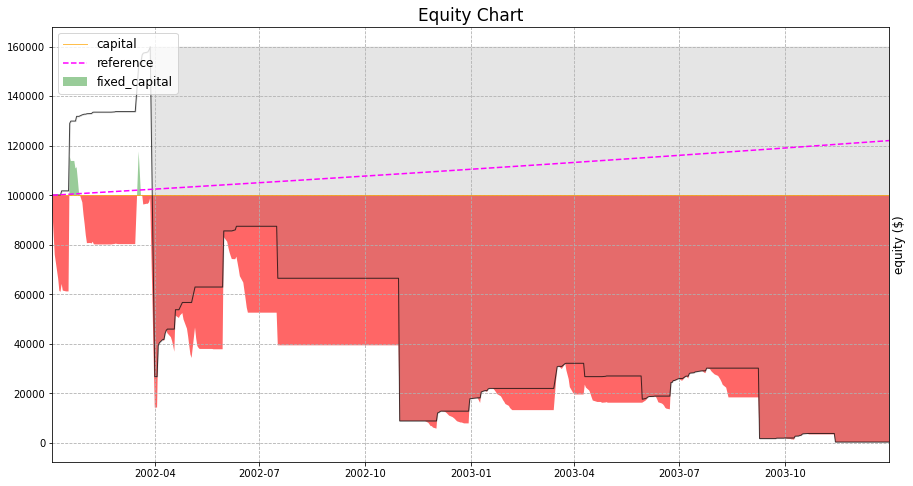

In [31]:
fig, ax = plt.subplots(1,1, figsize=(15, 8))
ax.fill_between(x,p,fixed_capital, where=fixed_capital>=p, facecolor='green', alpha=0.4, interpolate=True, label='fixed_capital')
ax.fill_between(x, p, fixed_capital, where=fixed_capital<p, facecolor='red', alpha=0.6, interpolate=True)
ax.fill_between(x, capital, max_capital, color='grey', alpha=0.2)

ax.plot(x, principal, color='orange',alpha=0.7, linewidth=1, label='capital')
ax.plot(x, capital, color='black',alpha=0.7, linewidth=1)

ax.set_xlim([x.min(), x.max()])

#reference curve
rate = 0.1 #annual interest rate
refx = (x-x[0])/np.timedelta64(365,'D')
refy = p*np.exp(rate*refx)
ax.plot(x, refy, color='magenta', linestyle='--', label='reference')

#labels
ax.legend(loc='upper left', fontsize='large')
ax.set_title('Equity Chart', fontsize=17)

#ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('equity ($)', fontsize=12)
ax.yaxis.set_label_position("right")
#style
ax.grid(linestyle='--')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.yaxis.tick_right()
fig.autofmt_xdate()
        
plt.show() 


In [11]:
class test:
    def __repr__(self):
        a={'a':1,'b':'sdf'}
        return f'{a}'

In [12]:
a=test()

In [13]:
b=[]

In [14]:
b.append(a)

In [17]:
b[0].name

11

In [16]:
a.name = 11

In [ ]:
trades = system.trades.book.statements

In [ ]:
trades = [trade for trade in trades if trade['result'] != 'REJECT']

In [ ]:
quote = trader.quotes['AD'].loc[today]

In [ ]:
quote

In [ ]:
trader.run()

In [ ]:
system.trades.book.statements

In [ ]:
price = quote['open']+round(diff*0.25)*instruments['AD'].tickunit

In [ ]:
round(price, 5)

In [ ]:
a={'b', 'c'}

In [ ]:
a['b'] = 1

In [ ]:
b['b'] = 'fffdd'

In [ ]:
a

In [ ]:
b

In [ ]:
c

In [ ]:
c.append(5)

In [ ]:
instruments.get_symbols('srf')

In [ ]:
type(trader.quotes)

In [ ]:
system.metrics.attrs['type']